## We recognize the connecting points
## We recognize the communities
## We calculate STM
## We calculate the clusters directly from the distance's matrix

In [1]:
library("Mapper")
library("biclust")
library("igraph")
library("pals")
library("gtools")
library("RcppCNPy")
library("stringr")
require("plotrix") 
library("lattice")
library("Rglpk")
library("matlab")
source("functions-R.R") #Functionslibrary("biclust")

Loading required package: MASS

Loading required package: grid

Loading required package: colorspace

Loading required package: lattice

Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘tibble’”

Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘gtools’


The following object is masked from ‘package:igraph’:

    permute


Loading required package: plotrix

Loading required package: slam

Using the GLPK callable library version 4.65


Attaching package: ‘matlab’


The following object is masked from ‘package:stats’:

    reshap

In [2]:
suspense=npyLoad("../Data/avg_suspense.npy")
length(suspense)

[1] 193

In [3]:
mappers=Sys.glob("../Data/mapper/*.rds")
mappers

[1] "../Data/mapper/all_l1_cmds.rds"       
[2] "../Data/mapper/all_l1_iso_rand.rds"   
[3] "../Data/mapper/all_l1_mmds.rds"       
[4] "../Data/mapper/all_l1-nothres_iso.rds"
[5] "../Data/mapper/all_l1_se.rds"         
[6] "../Data/mapper/all_l1-thres_iso.rds"

In [4]:
m = readRDS(mappers[6])

In [5]:
i=18

In [6]:
m[[i]]

Fixed Interval Cover: (number intervals = [6, 6], percent overlap = [35, 35]%)

In [7]:
graph=m[[i]]$graph
vert=m[[i]]$vertices

## Detection of connecting points
Points that when they are removed the graph has one more connected component (path connected)

In [9]:
connectors(graph)
minimum.size.separators(graph)

[1]  6 10 15 26 37 39

## Detection of communities

In [ ]:
communities=cluster_walktrap(graph)

In [ ]:
communities$membership
modularity(communities)

In [ ]:
for (i in 1:max(communities$membership))
    print(communities[[i]])

In [ ]:
#The only community that I want it recognizes is this one

Vertices=list()
#Inferior (112-145)
for (j in 1:max(communities$membership)){
    nodes=unlist(lapply(communities[[j]],as.integer))+1
    vertices = c()
    for (i in nodes)
        vertices=c(vertices,vert[[i]])
    Vertices[[j]] =sort(unique(vertices))
}
#vertices 

In [ ]:
lapply(Vertices,recog_block)

In [ ]:
# My commmunities including the one above
comm=list()
Vertices=list()

comm[[1]]=c(4,6,11,14,15) #15
vertices = c()
for (i in comm[[1]])
    vertices=c(vertices,vert[[i]])
Vertices[[1]]=sort(unique(vertices))
#vertices

#Inferior
comm[[2]]=c(31,32,34,35,37,39,41,42,44,47,48) 
vertices=c()
for (i in comm[[2]])
     vertices=c(vertices,vert[[i]])
Vertices[[2]]=sort(unique(vertices))
#vertices

#Middle
comm[[3]]=c(1,2,8)
vertices = c()
for (i in comm[[3]])
    vertices=c(vertices,vert[[i]])
Vertices[[3]]=sort(unique(vertices))
#vertices

#Upper 146-176
comm[[4]]= c(3,5,7,9,13,17,21,23,24,27,10) #10 
vertices = c()
for (i in comm[[4]])
    vertices=c(vertices,vert[[i]])
Vertices[[4]]=sort(unique(vertices))
#vertices 

#Middle 1
comm[[5]]=c(20,22,25,33,36,40,43) #20
vertices=c()
for (i in comm[[5]])
    vertices=c(vertices,vert[[i]])
Vertices[[5]]=sort(unique(vertices))
#vertices 

#Middle 2
comm[[6]]=c(38,45,46,49,50,51,52) #38,49,50
vertices=c()
for (i in comm[[6]])
    vertices=c(vertices,vert[[i]])
Vertices[[6]]=sort(unique(vertices))
#vertices

#Middle 3
comm[[7]]=c(12,16,18,19,26,28,29,30) #26
vertices=c()
for (i in comm[[7]])
    vertices=c(vertices,vert[[i]])
Vertices[[7]]=sort(unique(vertices))
#vertices


In [ ]:
vert[[12]]

In [ ]:
lapply(Vertices,recog_block)

### Modularity score of my communities

In [ ]:
my_comm = rep(7,52)
for (i in 1:length(comm)){
    index=comm[[i]]
    my_comm[index]=i
}  

In [ ]:
my_comm

In [ ]:
modularity(graph,my_comm)

## Degree

In [10]:
deg=degree(graph)
sort(deg)

13 19 37 48 49  0  1  2  3  6  8 10 15 16 18 20 22 23 24 26 30 31 34 39 43 44 
 1  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 
46 47 51  5  7 11 21 25 29 36 42 45 50  4 17 28 32 33 35 40 41 14 27 12 38  9 
 3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  6  6  7  8 12

In [11]:
mean(deg)

[1] 3.846154

## STM

In [8]:
i=18

In [9]:
m[[i]]
vert=m[[i]]$vertices
adj=m[[i]]$edges
M=tcm_matrix(vert,adj)
#save(M,file="../Data/all_l1_iso_tcm_6_35.RData")

Fixed Interval Cover: (number intervals = [6, 6], percent overlap = [35, 35]%)

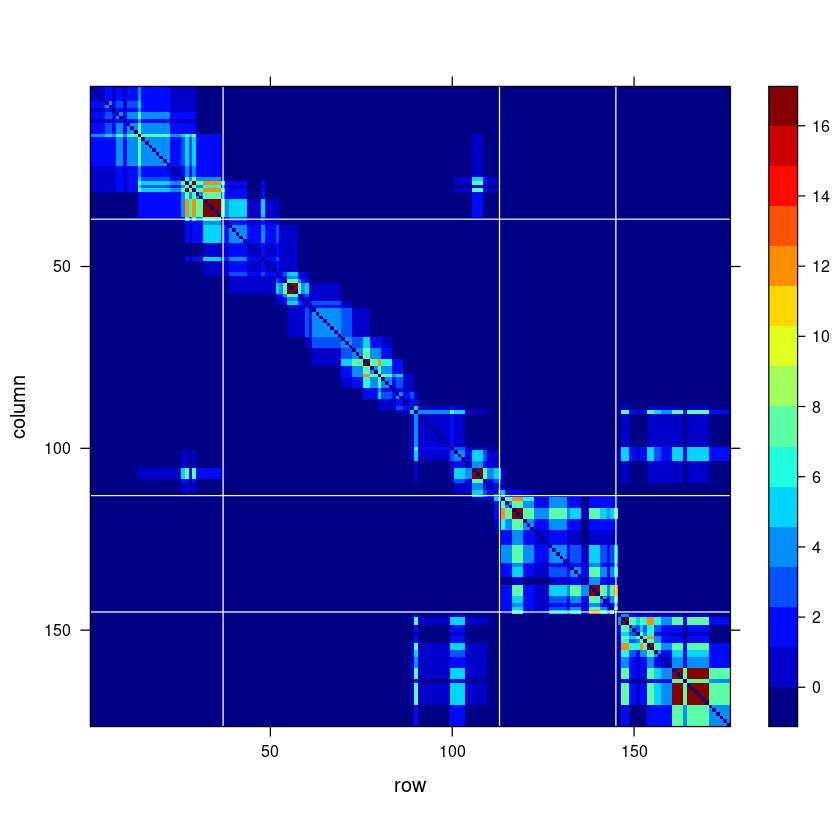

In [85]:
blocks=c(37,113,145)
par=(pin=c(8,7))
levelplot(M,col.regions=jet.colors(100),ylim=rev(c(0.5, 176.5)),
         panel = function(...){
            panel.levelplot(...)
            panel.abline(v = blocks,h= blocks,lwd=1,col='white')} 
         )

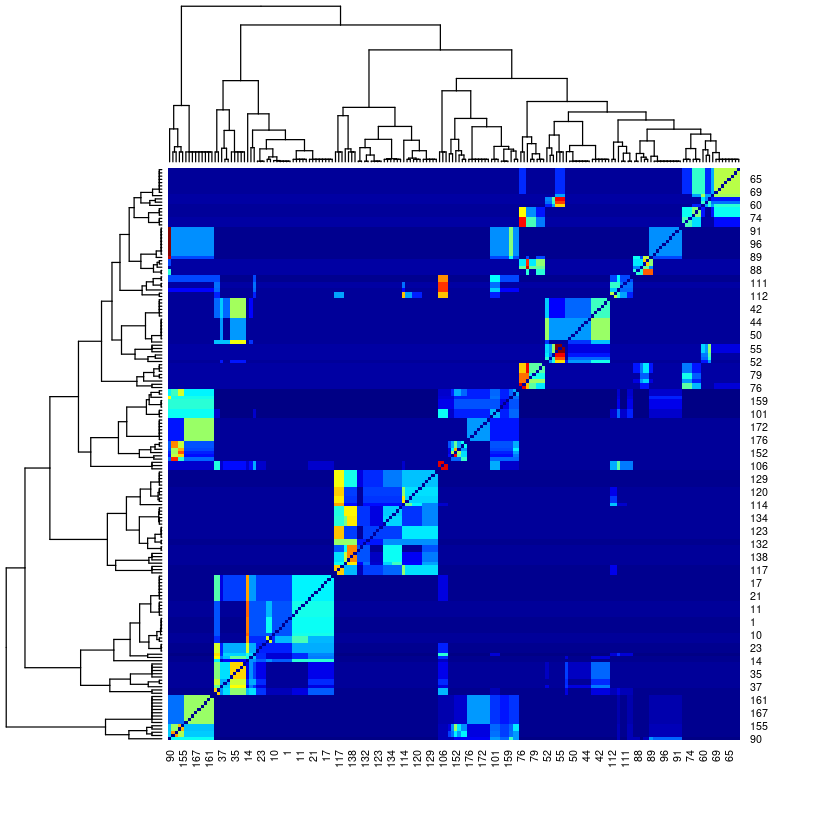

In [14]:
heatmap(M,distfun = function(x) dist(x,method = 'manhattan'),hclustfun = function(x) hclust(x,method = 'complete'),col=jet.colors(100))

### Recognize blocks using clustering

In [101]:
D=dist(M, method = "manhattan" )

In [109]:
hcl=list()
hcl[[1]]=hclust(D,method='single')
hcl[[2]]=hclust(D,method='complete')
hcl[[3]]=hclust(D,method='ward.D')

eps=list()
eps[[1]]=cutoff_first_threshold(hcl[[1]])
eps[[2]]=cutoff_first_threshold(hcl[[2]])
eps[[3]]=cutoff_first_threshold(hcl[[3]])
eps[[3]]=3000

mega_blocks=list()
for (i in 1:3){
    vector=cutree(hcl[[i]], h = eps[[i]])   
    c=length(unique(vector))
    cluster=list()
    for (j in 1:c){
        cluster[[j]]=which(vector == j, arr.ind = TRUE)
    }
   
    mega_blocks[[i]]=lapply(cluster,recog_block)
}

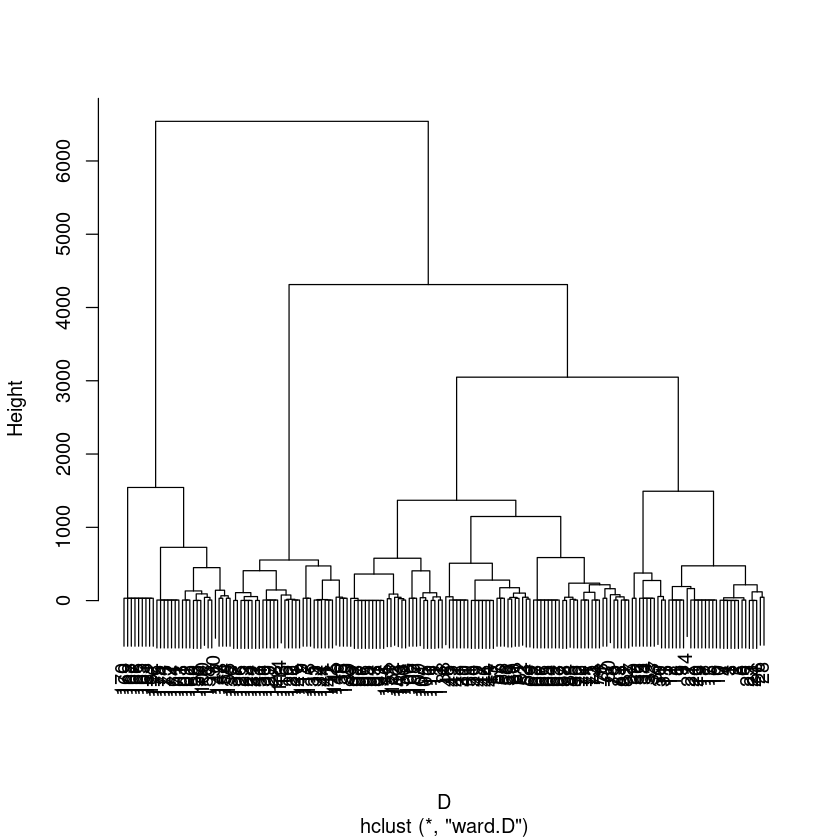

In [110]:
plot(hcl[[3]],sub=NULL,xlab=NULL,main="")

In [111]:
mega_blocks[[3]]

vec,1,37
vec,38,89
vec,91,99
vec,104,113
vec,146,146
vec,149,153
vec,90,90
vec,100,103
vec,147,148
vec,154,176
vec,114,145


In [112]:
blocks=mega_blocks[[3]]
save(blocks,file="../Data/blocks.Rdata")

### Spectral clustering

In [61]:
 graph_laplacian <- function(W, normalized = TRUE)
  {
    stopifnot(nrow(W) == ncol(W)) 
    
    g = colSums(W) # degrees of vertices
    n = nrow(W)
    
    if(normalized)
    {
      D_half = diag(1 / sqrt(g) )
      return( diag(n) - D_half %*% W %*% D_half )
    }
    else
    {
      return( diag(g) - W )
    }
  }

In [89]:
n_eig = 5
L = graph_laplacian(M) # 2. compute graph laplacian
ei = eigen(L, symmetric = TRUE) # 3. Compute the eigenvectors and values of L
n = nrow(L)
M_sc = ei$vectors[,(n - n_eig):(n - 1)] # return the eigenvectors of the n_eig smallest eigenvalues

# run kmeans on the 2 eigenvectors
M_sc_kmeans <- kmeans(M_sc, 4)

In [90]:
M_sc_kmeans$cluster

[1] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[112] 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4
[149] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

In [91]:
recog_block(which(M_sc_kmeans$cluster == 1))
recog_block(which(M_sc_kmeans$cluster == 2))
recog_block(which(M_sc_kmeans$cluster == 3))
recog_block(which(M_sc_kmeans$cluster == 4))
#recog_block(which(M_sc_kmeans$cluster == 5))

vec,73,88


vec,30,53
vec,114,145


vec,54,72


vec,1,29
vec,89,113
vec,146,176


## Can we recover the clusters from distance matrix?

In [121]:
og_dist=npyLoad('../Data/dist/all_l1-thres-geo.npy')
nrow(og_dist)

[1] 176

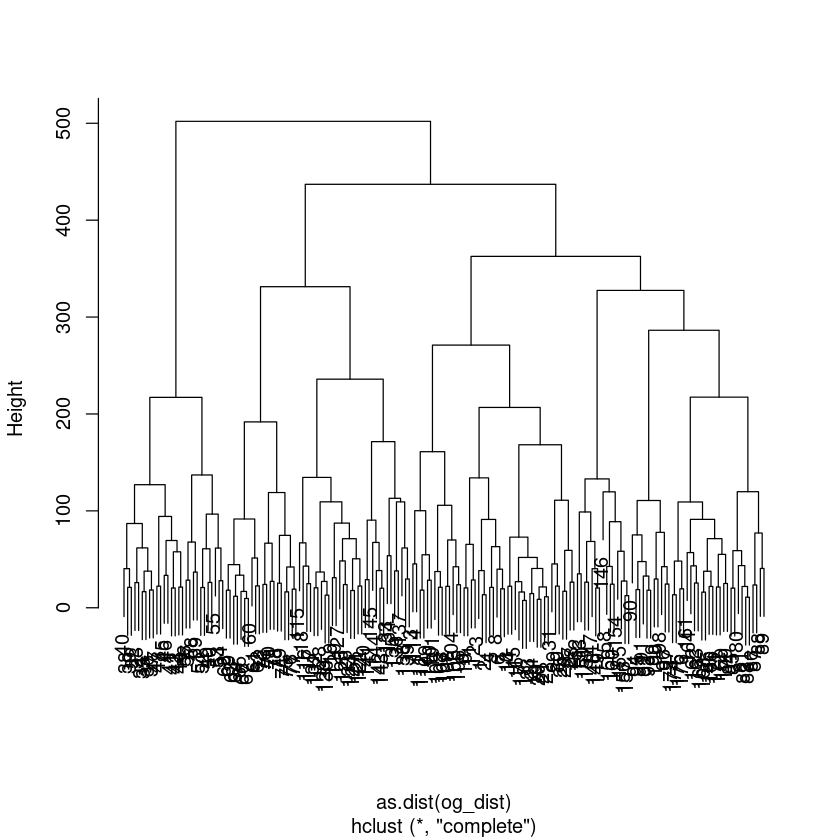

In [128]:
hcl=hclust(as.dist(og_dist),method='complete')
#pdf("../Imagenes/thesis/dendo_rows.pdf",width=7,height=8)
plot(hcl,sub=NULL,xlab=NULL,main="")
#dev.off()

In [129]:
#eps1=cutoff_first_threshold(hcl,adjust=1)
eps1=400
vector1=cutree(hcl, h = eps1)
c1=length(unique(vector1))
clusters1=list()
for (i in 1:c1){
    clusters1[[i]]=which(vector1 == i, arr.ind = TRUE)
}

In [130]:
mega_blocks1=lapply(clusters1,recog_block)
mega_blocks1

vec,1,31
vec,80,114
vec,146,176
vec,32,59
vec,60,79
vec,115,145


In [22]:
sort(c(2,5,6,2,7))

[1] 2 2 5 6 7